# ASSIGNMENT 4
# Submission Deadline: April 16, 6PM
# Submission Link: https://forms.gle/G4B6FiAsyoPLCkZu9  

# Table of Contents

1. [Provide Information](#Provide-Information)
2. [Instructions](#Instructions)
3. [Environment](#Environment)
4. [Hyperparameters](#Hyperparameters)
5. [Helper Functions](#helper)
6. [DDPG](#ddpg)
7. [TD3](#td3)
8. [PPO](#ppo)
9. [Experiments to Run](#experiments)

# Provide Information
<a id="Provide-Information"></a>

Name: **Shreyansh Pachauri**

Roll No.: **200954**

IITK EMail: **shreyanshp20@iitk.ac.in**

# Instructions
<a id="Instructions"></a>


**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), and an image folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via the Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
-  **DO NOT Forget to write name, roll no and email details above**
- **In addition to checking your code, we will be conducting one-on-one viva for the evaluation. So please make sure that you do not cheat!**
- **Use of LLMs based tools or AI-based code tools is strictly prohibited! Use of ChatGPT, VS Code, Gemini, CO-Pilot, etc. is not allowed. NOTE VS code is also not allowed. Even in Colab disable the AI assistant. If you use it, we will know it very easily. Use of any of the tools would be counted as cheating and would be given a ZERO, with no questions asked.**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# OpenAI Gym Environments
<a id="Environment"></a>

In [ ]:
# all imports go in here
!pip install gymnasium
!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install gymnasium[mujoco]

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import random
from itertools import count, cycle
from collections import deque, namedtuple

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376095 sha256=cdda4d0f18f2e7cc13582301122acce71bfa85d60f8b04690061f61b15547f6f
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 25.4 MB/s eta 0:00:00


In [ ]:
import math

In this assignment we will be exploring Deep RL algorithms and for this we will be using environmentd provided by OpenAI Gym. In particular we will be exploring "Pendulum-v1" , "Hopper-v4", and "Half-Cheetah" environments (https://gymnasium.farama.org/environments/classic_control/ ). The code to instantiate the environments are given in the cells below. Run these cells and play with the environments to learn more details about the environments.

In [ ]:
# Create Inverted Pendulum environment
#https://gymnasium.farama.org/environments/classic_control/cart_pole/

env1 = gym.make('Pendulum-v1', render_mode="rgb_array")
s = env1.reset(seed = 34)
print("Observation Space = ")
print(env1.observation_space)
print("Action Space = ")
print(env1.action_space)
done = False
for episode in range(20):
    s=env1.reset()[0]
    print("In episode {}".format(episode))
    done=False
    for i in range(100):
        env1.render()
        print(s)
        a = env1.action_space.sample()
        s, r, done, truncated, _ = env1.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
            break


Observation Space = 
Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action Space = 
Box(-2.0, 2.0, (1,), float32)
In episode 0
[-0.04558512 -0.99896044  0.3021226 ]
[-0.05542727 -0.99846274 -0.19709538]
[-0.09621264 -0.9953608  -0.8181201 ]
[-0.17718782 -0.98417705 -1.6353322 ]
[-0.28330678 -0.9590293  -2.1822422 ]
[-0.41223204 -0.9110789  -2.7532432 ]
[-0.55773515 -0.830019   -3.3350399 ]
[-0.71032214 -0.70387673 -3.9660244 ]
[-0.8432338  -0.53754693 -4.266305  ]
[-0.94902176 -0.31521064 -4.9369335 ]
[-0.998382  -0.0568636 -5.2756863]
[-0.9776212   0.21037306 -5.3770165 ]
[-0.89458287  0.44690216 -5.026858  ]
[-0.7567678  0.6536838 -4.982852 ]
[-0.5881508  0.8087513 -4.591676 ]
[-0.42897612  0.90331584 -3.7082295 ]
[-0.28975627  0.95710045 -2.9877362 ]
[-0.1827258  0.9831639 -2.2042792]
[-0.0957186  0.9954084 -1.7578572]
[-0.0564569   0.99840504 -0.78756875]
[-0.04990262  0.9987541  -0.13127153]
[-0.0902551   0.9959187   0.80909455]
[-0.16574705  0.9861683   1.5227481 ]
[-0.26813793  0

In [ ]:
# Create Hopper environment
# https://gymnasium.farama.org/environments/mujoco/hopper/

env2 = gym.make("Hopper-v4", render_mode = "rgb_array")
s = env2.reset(seed = 34)
print("Observation Space = ")
print(env2.observation_space)
print("Action Space = ")
print(env2.action_space)
done = False
for episode in range(1):
    s=env2.reset()[0]
    print("In episode {}".format(episode))
    done=False
    for i in range(100):
        #env.render()
        print(s)
        a = env2.action_space.sample()
        s, r, done, truncated, _ = env2.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
            break


Observation Space = 
Box(-inf, inf, (11,), float64)
Action Space = 
Box(-1.0, 1.0, (3,), float32)
In episode 0
[ 1.24678709e+00  3.68486092e-03  4.99501739e-03  4.10940538e-03
 -3.83450317e-03 -1.12346281e-03  4.25228755e-03 -4.08511691e-03
 -1.88061100e-03  1.71432688e-03  1.27495627e-03]
[ 1.24657508  0.00265822  0.00483906  0.00240145 -0.00601975 -0.054447
 -0.05735147 -0.24868808 -0.03252813 -0.42863312 -0.54702704]
[ 1.24569238e+00 -1.88201448e-03  7.78940208e-04  4.57226045e-05
 -5.18481091e-03 -5.50089855e-02 -1.63288851e-01 -8.93632341e-01
 -9.79400592e-01 -1.81566959e-01  7.55347549e-01]
[ 1.24409922e+00 -1.17940092e-02 -9.13548892e-03 -3.53687105e-03
  6.34611072e-04 -1.33589559e-01 -2.35669451e-01 -1.58361868e+00
 -1.49864862e+00 -7.13609656e-01  6.99433101e-01]
[ 1.24187444 -0.02299115 -0.01890593 -0.01018832  0.00710067 -0.12044851
 -0.32027104 -1.21610679 -0.94465216 -0.94890172  0.91682354]
[ 1.23893577 -0.03283511 -0.02570839 -0.01962146  0.01754955 -0.13587232
 -0.4146

In [ ]:
# Create Half-Cheetah environment
# https://gymnasium.farama.org/environments/mujoco/hopper/

env = gym.make("HalfCheetah-v4", render_mode = "rgb_array")
s = env.reset(seed = 34)
print("Observation Space = ")
print(env.observation_space)
print("Action Space = ")
print(env.action_space)
done = False
for episode in range(1):
    s=env.reset()
    done=False
    print("In episode {}".format(episode))
    for i in range(100):
        #env.render()
        print(s)
        a = env.action_space.sample()
        s, r, done, truncated, _ = env.step(a)
        if done:
            print("Finished after {} timestep".format(i+1))
env.close()


# Hyperparameters
<a id="Hyperparameters"></a>

All your hyperparameters should be stated here. We will change their value here and your code should work  accordingly.

In [ ]:
# mention the values of all the hyperparameters (you can add more hyper-paramters as well) to be used in the entire notebook, put the values that gave the best
# performance and were finally used for the agent

gamma = 0.99
noiseScaleRatio = 0.5
minSamples = 50
epocs = 100
tau = 0.9
bufferSize = 100
batchSize = 50

updateFrequency = 10
lr = 0.1
noiseScaleRatio = 0.1

MAX_TRAIN_EPISODES = 500
MAX_EVAL_EPISODES = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper Functions
<a id="helper"></a>

Write all the helper functions that will be used for value-based and policy based algorithms below. In case you want to add more helper functions, please feel free to add.

In [ ]:
#Value Network

def createValueNetwork(inDim, outDim, hDim=[32, 32], activation=F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return q-value for each possible action
    class MyValueNetwork(nn.Module):
        def __init__(self, input_dim=inDim, output_dim=outDim, hidden_dims=hDim, activation_fc=activation):
            super(MyValueNetwork, self).__init__()
            self.activation_fc = activation_fc

            # Device management
            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

            # Network layers
            self.input_layer = nn.Linear(input_dim, hidden_dims[0])
            self.hidden_layers = nn.ModuleList()
            for i in range(len(hidden_dims) - 1):
                self.hidden_layers.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
            self.output_layer = nn.Linear(hidden_dims[-1], output_dim)

            self.to(self.device)

        def _format(self, state):
            if not isinstance(state, torch.Tensor):
                state = torch.tensor(state, device=self.device, dtype=torch.float32)
            if state.dim() == 1:
                state = state.unsqueeze(0)
            return state

        def forward(self, state):
            x = self._format(state)
            x = self.activation_fc(self.input_layer(x))
            for hidden_layer in self.hidden_layers:
                x = self.activation_fc(hidden_layer(x))
            x = self.output_layer(x)
            return x

        def load(self, experiences):
            states, actions, rewards, new_states, is_terminals = experiences
            states = torch.from_numpy(states).float().to(self.device)
            actions = torch.from_numpy(actions).long().to(self.device)
            new_states = torch.from_numpy(new_states).float().to(self.device)
            rewards = torch.from_numpy(rewards).float().to(self.device)
            is_terminals = torch.from_numpy(is_terminals).float().to(self.device)
            return states, actions, rewards, new_states, is_terminals

    return MyValueNetwork

In [ ]:
#Policy Network
def createPolicyNetwork(inDim, outDim, hDim = [32,32], activation = F.relu):
    #this creates a Feed Forward Neural Network class and instantiates it and returns the class
    #the class should be derived from torch nn.Module and it should have init and forward method at the very least
    #the forward function should return action logit vector
    #Your code goes in here

    class policyNetwork(nn.Module):
      def __init__(self):
        super(policyNetwork, self).__init__()
        self.layers = nn.ModuleList()
        prev_dim = inDim
        for hid_dim in hDim:
          self.layers.append(nn.Linear(prev_dim, hid_dim))
          prev_dim = hid_dim
        self.output_layer = nn.Linear(prev_dim, outDim)

      def forward(self, state):
        try:
          x = torch.Tensor(state)
        except:
          x = torch.Tensor(state[0])
        for layer in self.layers:
          x = activation(layer(x))
        action_logits = self.output_layer(x)
        return action_logits

      def selectAction(self,state):
        action_logits = self.forward(state)
        action_logits = action_logits/torch.sum(action_logits)
        action = random.choices(range(outDim), weights=abs(action_logits))[0]
        log_prob = math.log(abs(action_logits[action]))
        return action, log_prob

    return policyNetwork

## ReplayBuffer

In next few cells, you will implement replaybuffer class.

This class creates a buffer for storing and retrieving experiences. This is a generic class and can be used
for different agents like NFQ, DQN, DDQN, PER_DDQN, etc.
Following are the methods for this class which are implemented in subsequent cells

```
class ReplayBuffer():
    def __init__(self, bufferSize, batch_size, seed)
    def store(self, state, action, reward, next_state, done)
    def sample(self, batchSize)
    def length(self)
```   

In [ ]:
class ReplayBuffer():
    def __init__(self, buffer_size, batch_size, seed):
        # this function creates the relevant data-structures, and intializes all relevant variables
        #Your code goes in here

        self.buffer_Size = buffer_size
        self.batch_size = batch_size
        self.seed=seed
        self.buffer=[]
        self._idx=0

        self.ss_mem = np.empty(shape=(buffer_size), dtype=np.ndarray)
        self.as_mem = np.empty(shape=(buffer_size), dtype=np.ndarray)
        self.rs_mem = np.empty(shape=(buffer_size), dtype=np.ndarray)
        self.ps_mem = np.empty(shape=(buffer_size), dtype=np.ndarray)
        self.ds_mem = np.empty(shape=(buffer_size), dtype=np.ndarray)
        self.size=0

        return

class ReplayBuffer(ReplayBuffer):
    def store(self, experience):
        #stores the experiences, based on parameters in init
        #
        #this function does not return anything
        #
        #Your code goes in here

        s, a, r, p, d = experience
        self.ss_mem[self._idx] = s
        self.as_mem[self._idx] = a
        self.rs_mem[self._idx] = r
        self.ps_mem[self._idx] = p
        self.ds_mem[self._idx] = d

        self._idx = (self._idx + 1) % self.buffer_Size
        self.size = min(self.size + 1, self.buffer_Size)


        return

class ReplayBuffer(ReplayBuffer):
    def sample(self, batchSize):
        # this method returns batchSize number of experiences
        # this function returns experiences samples
        #
        #Your code goes in here

        lst = np.random.choice(range(self.length()), batchSize)
        experiencesList = []

        for i in lst:
          e = (self.ss_mem[i], self.as_mem[i], self.rs_mem[i], self.ps_mem[i], self.ds_mem[i])
          experiencesList.append(e)

        return experiencesList

class ReplayBuffer(ReplayBuffer):
    def length(self):
        #tells the number of experiences stored in the internal buffer
        #
        #Your code goes in here
        #

        return self.size

class ReplayBuffer(ReplayBuffer):
    def splitExperiences(self, experiences):

      states, actions, rewards, nextStates, dones = zip(*experiences)

      return states, actions, rewards, nextStates, dones

## Deep Deterministic Policy Gradient (DDPG) ##
<a id="ddpg"></a>

Implement the Deep Deterministic Policy Gradient (DDPG) agent. We have studied about DDPG agent in the Lecture. Use the function definitions (given below).

This class implements the DDPG agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(self, env, seed, gamma, tau, bufferSize, batch_size, updateFrequency,
             policyOptimizerFn, valueOptimizerFn,
             policyOptimizerLR,valueOptimizerLR,
             MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE,
             optimizerFn)
    
    def runDDPG(self)
    def trainAgent(self)
    def gaussianStrategy(self, net , s , envActionRange , noiseScaleRatio,
        explorationMax = True)
    def greedyStrategy(self, net , s , envActionRange)
    def trainNetworks(self, experiences)
    def updateNetworks(self, onlineNet, targetNet, tau)
    def evaluateAgent(self)




```

In [ ]:
class DDPG():
    def __init__(self, env, seed=69, gamma=gamma, tau=tau, bufferSize=bufferSize, batch_size=batchSize, updateFrequency=updateFrequency,
             policyOptimizerFn=optim.Adam, valueOptimizerFn=optim.Adam,
             policyOptimizerLR=lr,valueOptimizerLR=lr,
             MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES,MAX_EVAL_EPISODE=MAX_EVAL_EPISODES,
             optimizerFn=optim.Adam):
        #this DDPG method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates targetValueNetwork , targetPolicyNetwork
        # 4. creates and initializes (with network params) the optimizer function
        # 5. creates onlineValueNetwork, onlinePolicyNetwork
        # 6. Creates the replayBuffer

        #Your code goes in here
        self.env = env
        self.seed = seed
        self.gamma = gamma
        self.tau = tau
        self.bufferSize = bufferSize
        self.batchSize = batch_size
        self.updateFrequency = updateFrequency
        self.policyOptimizerFn = policyOptimizerFn
        self.valueOptimizerFn = valueOptimizerFn

        self.maxIter = 300

        self.policyOptimizerLR = policyOptimizerLR
        self.valueOptimizerLR = valueOptimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.optimizerFn = optimizerFn

        self.targetValueNetwork = createValueNetwork(inDim = np.size(env.reset()[0])+env.action_space.shape[0], outDim=1)()
        self.onlineValueNetwork = createValueNetwork(inDim = np.size(env.reset()[0])+env.action_space.shape[0], outDim=1)()
        self.targetPolicyNetwork = createPolicyNetwork(inDim = np.size(env.reset()[0]), outDim=env.action_space.shape[0])()
        self.onlinePolicyNetwork = createPolicyNetwork(inDim = np.size(env.reset()[0]), outDim=env.action_space.shape[0])()
        self.updateNetworks(tau)
        self.rBuffer = ReplayBuffer(self.bufferSize, self.batchSize, self.seed)
        return

    def updateNetworks(self, tau):

        #this function updates the onlineNetwork with the target network
        #
        # Your code goes in here
        #

      for tParam, oParam in zip(self.targetValueNetwork.parameters(), self.onlineValueNetwork.parameters()):
        mixedWeights = (1-tau)*tParam.data + tau*oParam.data
        tParam.data.copy_(mixedWeights)

      for tParam, oParam in zip(self.targetPolicyNetwork.parameters(), self.onlinePolicyNetwork.parameters()):
        mixedWeights = (1-tau)*tParam.data + tau*oParam.data
        tParam.data.copy_(mixedWeights)

      pass

    def gaussianStrategy(self,net,s,envActionRange, noiseScaleRatio, explorationMax=True):
      actionLowVal, actionHighVal = envActionRange
      if explorationMax:
        scale = actionHighVal
      else:
        scale = noiseScaleRatio*actionHighVal

      greedyAction = net.forward(s).detach()
      noise = np.random.normal(0,scale,greedyAction.shape)
      action = greedyAction + noise
      action = np.clip(action, actionLowVal, actionHighVal)
      return action

    def greedyStrategy(self, net, s, envActionRange):
      actionLowVal, actionHighVal = envActionRange
      greedyAction = net.forward(s).detach()
      action = np.clip(greedyAction, actionLowVal, actionHighVal)
      return action

    def runDDPG(self):
      totalSteps, totalReward, meanEvalScoreList, trainingTimeList, wallclockElapsed = self.trainAgent()
      resultsEval = self.evaluateAgent()

      trainRewardsList = totalReward
      trainTimeList = trainingTimeList
      evalRewardsList = meanEvalScoreList
      wallClockTimeList = wallclockElapsed
      finalEvalReward = resultsEval


      meanTrainRewards = []
      meanEvalRewards = []

      sum1=0
      sum2=0
      for i in range(len(trainRewardsList)):
          sum1+=trainRewardsList[i]
          meanTrainRewards.append(sum1/(i+1))
      for i in range(len(meanEvalScoreList)):
          sum2+=evalRewardsList[i]
          meanEvalRewards.append(sum2/(i+1))

      return meanTrainRewards, trainTimeList, meanEvalRewards, wallClockTimeList, totalSteps


    def trainAgent(self):

      totalSteps = []
      totalReward = []
      meanEvalScoreList = []
      trainingTimeList = []
      wallclockElapsed = []

      self.updateNetworks(self.tau)
      for e in range(self.MAX_TRAIN_EPISODES):
        start_time = time.time()
        envActionRange = (self.env.action_space.low, self.env.action_space.high)
        s, done = self.env.reset()
        n_steps=0
        tr = 0
        while not done and n_steps<self.maxIter:
          a = self.gaussianStrategy(self.onlinePolicyNetwork, s, envActionRange, noiseScaleRatio, self.rBuffer.length()<minSamples)
          s_next, r, done, truncated , info = self.env.step(np.array(a))
          tr+=r
          experience = (s,a,r,s_next,done)
          self.rBuffer.store(experience)
          n_steps+=1

          if self.rBuffer.length()>minSamples:
            experiences = self.rBuffer.sample(self.batchSize)
            self.trainNetworks(experiences)

          if e%self.updateFrequency==0:
            self.updateNetworks(tau)

        mean_eval_score = np.mean(np.array(self.evaluateAgent()))
        totalReward.append(tr)
        trainingTimeList.append(time.time()-start_time)
        totalSteps.append(n_steps)
        meanEvalScoreList.append(mean_eval_score)
        wallclockElapsed.append(time.time())
      return totalSteps, totalReward, meanEvalScoreList, trainingTimeList, wallclockElapsed

    def trainNetworks(self, experiences):

      states, actions, rewards, nStates, dones = self.rBuffer.splitExperiences(experiences)
      dones = torch.FloatTensor(dones)

      arg_max_a_qs_v=[]
      for ns in nStates:
        arg_max_a_qs_v.append(self.targetPolicyNetwork.forward(ns))

      max_a_qs_v=list()
      temp=[]
      for i in range(len(nStates)):
        ns = nStates[i]
        ns=torch.Tensor(ns)
        na = arg_max_a_qs_v[i]
        na = torch.Tensor(na).detach()
        x = self.targetValueNetwork.forward(torch.cat((torch.Tensor(ns),torch.Tensor(na)))).detach().numpy()[0][0]
        max_a_qs_v.append(x)

      max_a_qs_v = torch.Tensor(max_a_qs_v)

      target_qs = np.array(rewards)+gamma*(max_a_qs_v.detach().numpy())*(1-dones).detach().numpy()

      qs=[]
      for i in range(len(states)):
        s = states[i]
        a = actions[i]
        qs.append(self.onlineValueNetwork.forward(torch.cat((torch.Tensor(s),torch.Tensor(a)))))

      qs = torch.Tensor(qs)

      tdErrors = target_qs.detach() - qs.detach()

      valueLoss = np.mean(0.5*(tdErrors)**2)
      self.valueOptimizerFn.zero_grad()
      valueLoss.backward()

      MAX_VALUE_GRAD_NORM = 1000
      torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork.parameters(), MAX_VALUE_GRAD_NORM)
      self.valueOptimizerFn.step()

      argmax_a_qs_p = []
      for i in range(len(nStates)):
        ns = nStates[i]
        argmax_a_qs_p.append(self.onlinePolicyNetwork.forward(ns))

      max_a_qs_p = []
      for i in range(len(nStates)):
        ns = nStates[i]
        na = argmax_a_qs_p[i]
        max_a_qs_p.append(self.onlineValueNetwork.forward(torch.cat((torch.Tensor(ns), na))))

      max_a_qs_p = np.array(max_a_qs_p)

      policyLoss = -1.0*(np.mean(max_a_qs_p))


      MAX_POLICY_GRAD_NORM = 1000
      self.policyOptimizerFn.zero_grad()
      policyLoss.backward()
      torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork.parameters(), MAX_POLICY_GRAD_NORM)
      self.policyOptimizerFn.step()

      return

    def evaluateAgent(self):
      rewards=[]
      envActionRange = (self.env.action_space.low, self.env.action_space.high)
      for e in self.count():
        rs = 0
        s, done = self.env.reset()
        for c in self.count():
          a = self.greedyStrategy(self.onlinePolicyNetwork, s, envActionRange)
          s, r, done, truncated, info = self.env.step(np.array(a))
          rs+=r
          if done:
            break
        rewards.append(rs)
      return rewards

    def count(self):

      return range(10)

    pass

In [ ]:
MAX_TRAIN_EPISODES=100
obj = DDPG(env1, MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
res = obj.runDDPG()

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

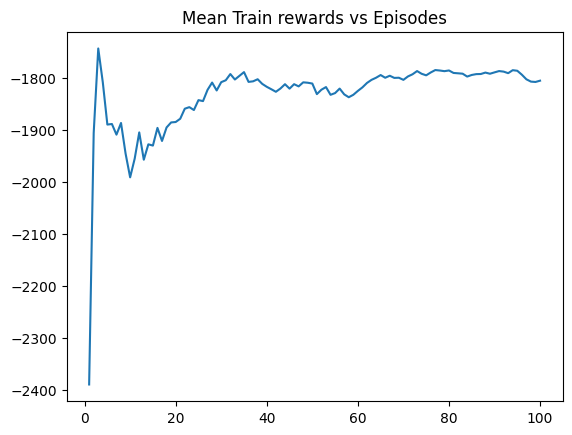

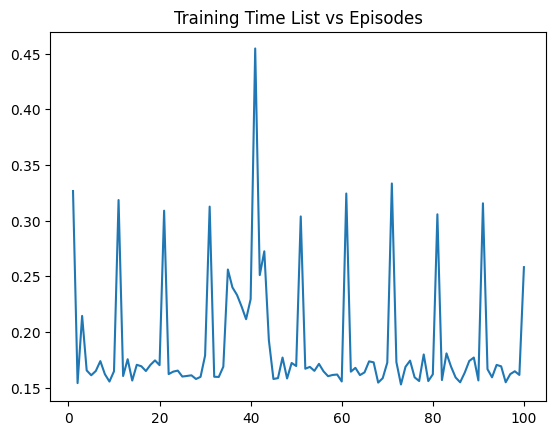

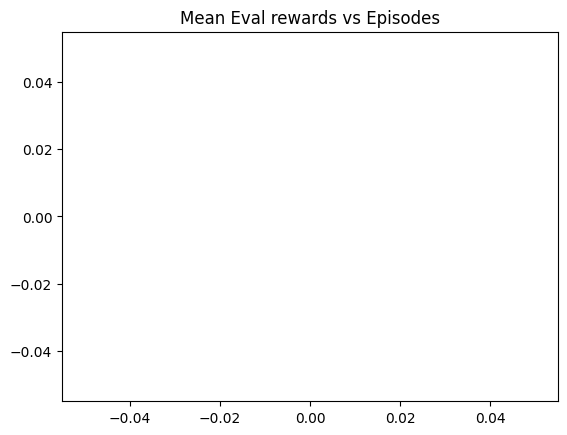

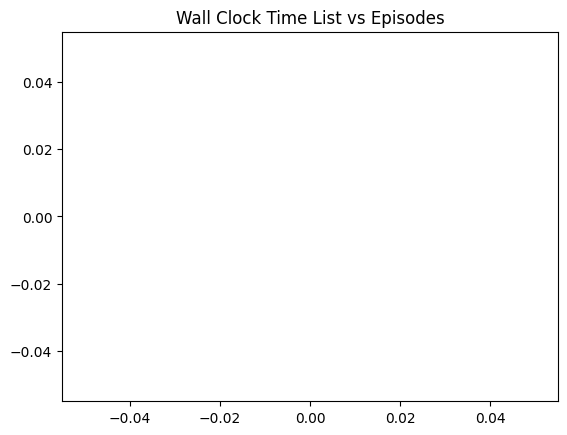

In [ ]:
e = np.array(range(MAX_TRAIN_EPISODES))
plt.figure()
plt.plot(e+1, np.array(res[0]))
plt.title("Mean Train rewards vs Episodes")
plt.show()

plt.figure()
plt.plot(e+1,np.array(res[1]))
plt.title("Training Time List vs Episodes")
plt.show()

plt.figure()
plt.plot(e+1, np.array(res[2]))
plt.title("Mean Eval rewards vs Episodes")
plt.show()

plt.figure()
plt.plot(e+1,np.array(res[3]))
plt.title("Wall Clock Time List vs Episodes")
plt.show()


# Twin-Delayed Deep Deterministic Policy Gradient (TD3)
<a id="td3"></a>

Implement the Twin-delayed deep deterministic policy gradient (TD3) agent. We have studied about TD3 agent in the Lecture. Use the function definitions (given below).

This class implements the TD3 agent, you are required to implement the various methods of this class
as outlined below. Note this class is generic and should work with any permissible Gym environment

```
class DDPG():
    def init(env, gamma, tau,
    bufferSize ,
    updateFrequencyPolicy ,
    updateFrequencyValue ,
    trainPolicyFrequency ,
    policyOptimizerFn ,
    valueOptimizerFn ,
    policyOptimizerLR ,
    valueOptimizerLR ,
    MAX TRAIN EPISODES,
    MAX EVAL EPISODE,
    optimizerFn )
    
    def runTD3 (self)
    def trainAgent (self)
    def gaussianStrategy (self, net , s , envActionRange , noiseScaleRatio ,
        explorationMax = True)
    def greedyStrategy (self, net , s , envActionRange)
    def trainNetworks (self,experiences , envActionRange)
    def updateValueNetwork(self, onlineNet, targetNet, tau)
    def updatePolicyNetwork(self, onlineNet, targetNet, tau)
    def evaluateAgent (self)



```

In [ ]:
class TD3():
    def __init__(self,env,seed=69, gamma=gamma, tau=tau,
    bufferSize=bufferSize ,
    updateFrequencyPolicy=updateFrequency ,
    updateFrequencyValue=updateFrequency ,
    trainPolicyFrequency=updateFrequency ,
    policyOptimizerFn = optim.Adam ,
    valueOptimizerFn = optim.Adam,
    policyOptimizerLR = lr ,
    valueOptimizerLR = lr ,
    MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES,
    MAX_EVAL_EPISODE = MAX_EVAL_EPISODES,
    optimizerFn = optim.Adam, MAX_VALUE_GRAD_NORM=1000, MAX_POLICY_GRAD_NORM=1000, minSamples=1000):
        #this TD3 method
        # 1. creates and initializes (with seed) the environment, train/eval episodes, gamma, etc.
        # 2. creates and intializes all the variables required for book-keeping values via the initBookKeeping method
        # 3. creates targetValueNetwork , targetPolicyNetwork
        # 4. creates and initializes (with network params) the optimizer function
        # 5. creates onlineValueNetwork, onlinePolicyNetwork
        # 6. Creates the replayBuffer

        #Your code goes in here
        self.env = env
        self.gamma = gamma
        self.tau = tau
        self.bufferSize = bufferSize
        self.batchSize = batchSize
        self.seed = seed
        self.updateFrequencyPolicy = updateFrequencyPolicy
        self.updateFrequencyValue = updateFrequencyValue
        self.trainPolicyFrequency = trainPolicyFrequency
        self.policyOptimizerLR = policyOptimizerLR
        self.valueOptimizerLR = valueOptimizerLR
        self.MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES
        self.MAX_EVAL_EPISODES = MAX_EVAL_EPISODES
        self.optimizer = optimizerFn
        self.minSamples = 50

        self.onlineValueNetwork1 = createValueNetwork(inDim = np.size(env.reset()[0])+env.action_space.shape[0], outDim=1)()
        self.onlineValueNetwork2 = createValueNetwork(inDim = np.size(env.reset()[0])+env.action_space.shape[0], outDim=1)()
        self.targetValueNetwork1 = createValueNetwork(inDim = np.size(env.reset()[0])+env.action_space.shape[0], outDim=1)()
        self.targetValueNetwork2 = createValueNetwork(inDim = np.size(env.reset()[0])+env.action_space.shape[0], outDim=1)()

        self.MAX_VALUE_GRAD_NORM = MAX_VALUE_GRAD_NORM
        self.MAX_POLICY_GRAD_NORM = MAX_POLICY_GRAD_NORM

        self.targetPolicyNetwork = createPolicyNetwork(inDim = np.size(env.reset()[0]), outDim=env.action_space.shape[0])()
        self.onlinePolicyNetwork = createPolicyNetwork(inDim = np.size(env.reset()[0]), outDim=env.action_space.shape[0])()

        self.rBuffer = ReplayBuffer(self.bufferSize, self.batchSize,self.seed)
        self.policyOptimizerFn = policyOptimizerFn(self.onlinePolicyNetwork.parameters(), lr = policyOptimizerLR)
        self.valueOptimizerFn1 = valueOptimizerFn(self.onlineValueNetwork1.parameters(), lr = valueOptimizerLR)
        self.valueOptimizerFn2 = valueOptimizerFn(self.onlineValueNetwork2.parameters(), lr = valueOptimizerLR)

        return

    def updateValueNetwork(self, onlineNet, targetNet):
        #this function updates the onlineValueNetwork with the targetValuenetwork
        #
        # Your code goes in here
        #

      for tParam, oParam in zip(targetNet.parameters(), onlineNet.parameters()):
        mixedWeights = (1-self.tau)*tParam.data + self.tau*(oParam.data)
        tParam.data.copy_(mixedWeights)


      return

    def updatePolicyNetwork(self, onlineNet, targetNet):

      for tParam, oParam in zip(onlineNet.parameters(), targetNet.parameters()):
        mixedWeights = (1-self.tau)*tParam.data + self.tau*(oParam.data)
        tParam.data.copy_(mixedWeights)

      return

    def gaussianStrategy(self, net, s, envActionRange, noiseScaleRatio, explorationMax=True):

      actionLowVal, actionHighVal = envActionRange

      if explorationMax:
        scale = actionHighVal
      else:
        scale = noiseScaleRatio*actionHighVal

      greedyAction = net.forward(s).detach()

      noise = np.random.normal(0,scale,greedyAction.shape)
      action = greedyAction + noise
      action = np.clip(action, actionLowVal, actionHighVal)
      return action

    def greedyStrategy(self,net,s,envActionRange):

      actionLowVal, actionHighVal = envActionRange

      action = net.forward(s).detach()

      action = np.clip(action, actionLowVal, actionHighVal)

      return action

    def runTD3(self):

      trainRewards, meanEvalScore, trainingTimeList, wallClockElapsed, totalSteps = self.trainAgent()

      meanTrainRewards = []
      meanEvalRewards = []

      sum1=0
      sum2=0

      for i in range(len(trainRewards)):
          sum1+=trainRewards[i]
          meanTrainRewards.append(sum1/(i+1))
      for i in range(len(meanEvalScore)):
          sum2+=meanEvalScore[i]
          meanEvalRewards.append(sum2/(i+1))



      return meanTrainRewards, trainingTimeList, meanEvalRewards, wallClockElapsed, totalSteps

    def trainAgent(self):
      self.updateValueNetwork(self.onlineValueNetwork1, self.targetValueNetwork1)
      self.updateValueNetwork(self.onlineValueNetwork2, self.targetValueNetwork2)
      self.updatePolicyNetwork(self.onlinePolicyNetwork, self.targetPolicyNetwork)

      rewardsList = []
      trainingTimeList = []
      meanEvalScoreList = []
      wallClockElapsed = []
      steps = []
      for e in range(self.MAX_TRAIN_EPISODES):
        envActionRange = (self.env.action_space.low, self.env.action_space.high)
        s, done = self.env.reset()
        tr = 0
        start = time.time()
        n_steps=0
        while not done:
          a = self.gaussianStrategy(self.onlinePolicyNetwork, s, envActionRange, noiseScaleRatio, self.rBuffer.length()<self.minSamples)

          s_next, r, done, truncated, info = self.env.step(np.array(a))
          tr+=r
          experience = (s,a,r,s_next,done)

          self.rBuffer.store(experience)

          if self.rBuffer.length()>self.minSamples:
            experiences = self.rBuffer.sample(self.batchSize)
            self.trainNetworks(experiences,envActionRange,e)

          if e%self.updateFrequencyValue==0:
            self.updateValueNetwork(self.onlineValueNetwork1, self.targetValueNetwork1)
            self.updateValueNetwork(self.onlineValueNetwork2, self.targetValueNetwork2)

          if e%self.updateFrequencyPolicy==0:
            self.updatePolicyNetwork(self.onlinePolicyNetwork, self.targetPolicyNetwork)
          n_steps+=1

        steps.append(n_steps)
        mean_eval_score = np.mean(np.array(self.evaluateAgent()))
        rewardsList.append(tr)
        trainingTimeList.append(time.time()-start)
        meanEvalScoreList.append(mean_eval_score)
        wallClockElapsed.append(time.time())

      return rewardsList, meanEvalScoreList, trainingTimeList, wallClockElapsed, steps

    def trainNetworks(self, experiences, envActionRange, episode):

      print("train")
      actionLowVal, actionHighVal = envActionRange

      ss, acts, rs, sNexts, dones = self.rBuffer.splitExperiences(experiences)
      dones = torch.FloatTensor(dones)
      as_noise = (actionHighVal-actionLowVal)*(acts[np.random.choice(len(acts), 1, replace=False)[0]].detach().numpy())

      as_noise = np.clip(as_noise,actionLowVal, actionHighVal)

      argmax_a_qs_v = []

      for ns in sNexts:
        argmax_a_qs_v.append(self.targetPolicyNetwork.forward(ns))

      argmax_a_qs_v = torch.Tensor(argmax_a_qs_v)

      noisy_argmax_a_qs_v = argmax_a_qs_v + as_noise

      noisy_argmax_a_qs_v = np.clip(noisy_argmax_a_qs_v, actionLowVal, actionHighVal)

      max_1_a_qs_v=[]
      for ns,na in sNexts, noisy_argmax_a_qs_v:
        ns = torch.Tensor(ns)
        na = torch.Tensor(na)
        max_1_a_qs_v.append(self.targetValueNetwork1.forward(torch.cat(ns,na)))

      max_1_a_qs_v = max_1_a_qs_v.detach().numpy()

      max_2_a_qs_v = []

      for ns, na in sNexts, noisy_argmax_a_qs_v:
        ns = torch.Tensor(ns)
        na = torch.Tensor(na)
        max_2_a_qs_v.append(self.targetValueNetwork2.forward(torch.cat(ns,na)))

      max_2_a_qs_v = max_2_a_qs_v.detach().numpy()

      max_a_qs_v = np.minimum(max_1_a_qs_v, max_2_a_qs_v)

      target_qs = torch.Tensor(rs) + self.gamma*(max_a_qs_v)*(1-dones)

      qs_1=[]
      qs_2=[]
      for s,a in ss,acts:
        s = torch.Tensor(s)
        a = torch.Tensor(a)
        qs_1.append(self.onlineValueNetwork1.forward(torch.cat(s,a)))
        qs_2.append(self.onlineValueNetwork2.forward(torch.cat(s,a)))

      qs_1 = np.array(qs_1)
      qs_2 = np.array(qs_2)

      tdErrors_1 = torch.Tensor(target_qs).detach()-torch.Tensor(qs_1)
      tdErrors_2 = torch.Tensor(target_qs).detach()-torch.Tensor(qs_2)

      valueLoss = torch.mean(0.5*(tdErrors_1)**2)+torch.mean(0.5*(tdErrors_2)**2)
      self.valueOptimizerFn1.zero_grad()
      valueLoss.backward()
      torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork1.parameters(), self.MAX_VALUE_GRAD_NORM)
      self.valueOptimizerFn1.step()


      self.valueOptimizerFn2.zero_grad()
      valueLoss.backward()
      torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork2.parameters(), self.MAX_VALUE_GRAD_NORM)
      self.valueOptimizerFn2.step()

      if episode%self.trainPolicyFrequency:

        argmax_a_qs_p = []
        for ns in sNexts:
          ns = torch.Tensor(ns)
          argmax_a_qs_p.append(self.onlinePolicyNetwork.forward(ns))

        argmax_a_qs_p = torch.Tensor(argmax_a_qs_p)

        max_a_qs_p = []
        for ns,na in sNexts, argmax_a_qs_p:
          ns = torch.Tensor(ns)
          na = torch.Tensor(na)
          max_a_qs_p.append(max(self.onlineValueNetwork1.forward(ns,na), self.onlineValueNetwork2.forward(ns,na)))

        max_a_qs_p = torch.Tensor(max_a_qs_p)

        policyLoss = -1.0*(torch.mean(max_a_qs_p))

        self.policyOptimizerFn.zero_grad()
        policyLoss.backward()
        torch.nn.utils.clip_grad_norm_(self.onlineValueNetwork2.parameters(), self.MAX_POLICY_GRAD_NORM)
        self.policyOptimizerFn.step()

      return

    def evaluateAgent(self):
      rewards = []
      envActionRange = (self.env.action_space.low, self.env.action_space.high)
      for e in range(self.MAX_EVAL_EPISODES):
        rs = 0
        s, done = self.env.reset()
        for c in self.count():
          a = self.greedyStrategy(self.onlinePolicyNetwork, s, envActionRange)
          s, r, done, truncated, info = self.env.step(np.array(a))
          rs+=r
          if done:
            rewards.append(rs)
            break

      return rewards

    def count(self):
      return range(10000)
    pass

In [ ]:
MAX_TRAIN_EPISODES=1000
obj = TD3(env2, MAX_TRAIN_EPISODES = MAX_TRAIN_EPISODES)
res2 = obj.runTD3()


train


ValueError: only one element tensors can be converted to Python scalars

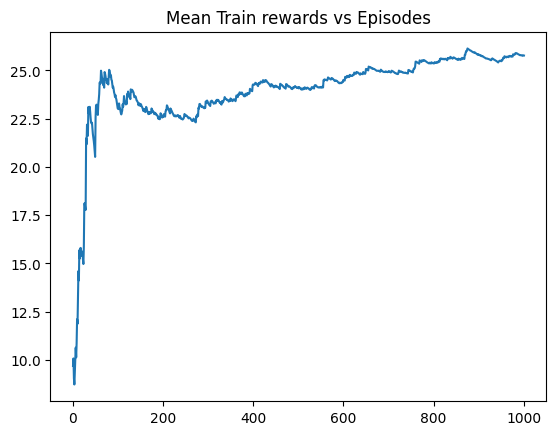

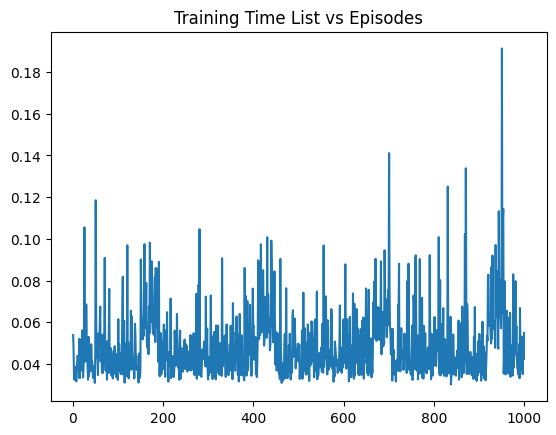

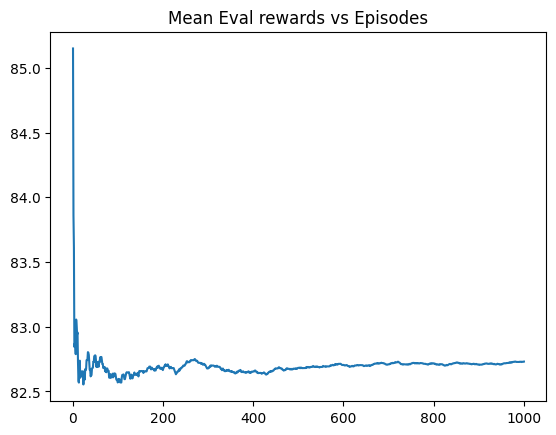

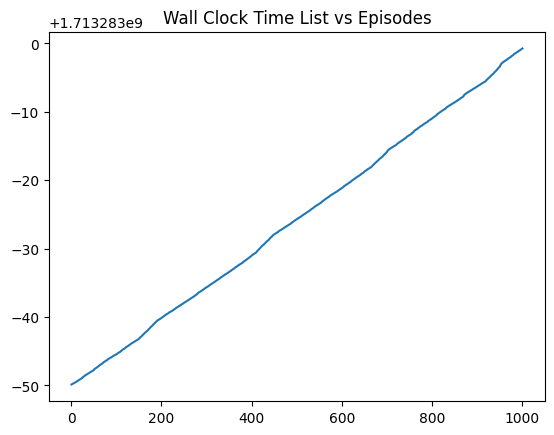

In [ ]:
e = np.array(range(MAX_TRAIN_EPISODES))
plt.figure()
plt.plot(e+1, np.array(res2[0]))
plt.title("Mean Train rewards vs Episodes")
plt.show()

plt.figure()
plt.plot(e+1,np.array(res2[1]))
plt.title("Training Time List vs Episodes")
plt.show()

plt.figure()
plt.plot(e+1, np.array(res2[2]))
plt.title("Mean Eval rewards vs Episodes")
plt.show()

plt.figure()
plt.plot(e+1,np.array(res2[3]))
plt.title("Wall Clock Time List vs Episodes")
plt.show()


# PPO
<a id="PPO"></a>

PPO have quite a few key implementation details.
Please Refer:
"Proximal Policy Optimization Algorithms" [PPO](https://arxiv.org/abs/1707.06347) and
"Implementation Matters in Deep RL: A Case Study on PPO and TRPO" [Implementation Matters](https://openreview.net/forum?id=r1etN1rtPB)

Lets finish things off with an easy implementation of PPO!
A easy way to check you implementation details is running your implementation on some easier environment first and make sure it converges. Like "CartPole-v1" should converge to episodic return of 500 in around 300k steps.

In [ ]:
#All imports here
## Feel free to add or remove

import os
import random
import time
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

In [ ]:
#Hyperparameters
gym_id = "CartPole-v1"  #The id of the gym environment
learning_rate =
seed = 1
total_timesteps =  #The total timesteps of the experiments
torch_deterministic = True   #If toggled, `torch.backends.cudnn.deterministic=False
cuda = True

num_envs = 4  #The number of parallel game environments (Yes PPO works with vectorized environments)
num_steps = 128 #The number of steps to run in each environment per policy rollout
anneal_lr = True #Toggle learning rate annealing for policy and value networks
gae = True #Use GAE for advantage computation
gamma =
gae_lambda =  #The lambda for the general advantage estimation
num_minibatches = 4
update_epochs =  #The K epochs to update the policy
norm_adv = True  #Toggles advantages normalization
clip_coef =  #The surrogate clipping coefficient (See what is recommended in the paper!)
clip_vloss = True #Toggles whether or not to use a clipped loss for the value function, as per the paper
ent_coef =  #Coefficient of the entropy
vf_coef =  #Coefficient of the value function
max_grad_norm = 0.5
target_kl = None #The target KL divergence threshold


batch_size = int(num_envs * num_steps)
minibatch_size = int(batch_size // num_minibatches)


In [ ]:
#PPO works with vectorized enviromnets lets make a function that returns a function that returns an environment.
#Refer how to make vectorized environments in gymnasium
def make_env(gym_id, seed):
    #Your code here
    pass

In [ ]:
#We initialize the layers in PPO , refer paper.
#Lets initialize the layers with this function
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    #Initializes the weights and bias of the layers
    #Your code here
    return layer


In [ ]:
#Lets make the Main agent class
class Agent(nn.Module):
    def __init__(self, envs):
        super(Agent, self).__init__()
        #self.critic = # Your code here (Critic Network)
        #(Returns a single value of the observation)

        #self.actor = # Your code here (Actor Network)
        #(Returns the logits of the actions on the observations)


In [ ]:
class Agent(Agent):
        def get_value(self, x):
            # Returns the value from the critic on the observation x
            return

In [ ]:
class Agent(Agent):
    def get_action_and_value(self, x, action=None):
        #Returns 1.the action (sampled according to the logits),
        #2.log_prob of the action,
        #3.Entropy,
        #4.Value from the critic

        #Your code here
        return


In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = torch_deterministic

device = torch.device("cuda" if torch.cuda.is_available() and cuda else "cpu")


In [ ]:
#Make the vectorized environments, use the helper function that we have declared above
envs = # Your code here

In [ ]:
agent = Agent(envs).to(device)
optimizer = optim.Adam(agent.parameters(), lr=learning_rate, eps=) #eps is not the default that pytorch uses

# ALGO Logic: Storage setup
obs = torch.zeros((num_steps, num_envs) + envs.single_observation_space.shape).to(device)
actions = torch.zeros((num_steps, num_envs) + envs.single_action_space.shape).to(device)
logprobs = torch.zeros((num_steps, num_envs)).to(device)
rewards = torch.zeros((num_steps, num_envs)).to(device)
dones = torch.zeros((num_steps, num_envs)).to(device)
values = torch.zeros((num_steps, num_envs)).to(device)


In [ ]:
# Start the game
global_step = 0
start_time = time.time()
next_obs, info = envs.reset()
next_obs = torch.Tensor(next_obs).to(device)
next_done = torch.zeros(num_envs).to(device)
num_updates = total_timesteps // batch_size

In [ ]:
#This is the main training loop where we collect the experience ,
#calculate the advantages, ratio , the total loss and learn the policy

for update in range(1, num_updates + 1):

    # Annealing the rate if instructed to do so.
    if anneal_lr:
        # Your code here
        pass

    for step in range(0, num_steps):
        global_step += 1 * num_envs  # We are taking a step in each environment
        obs[step] = next_obs
        dones[step] = next_done

        # ALGO LOGIC: action logic
        with torch.no_grad():
            #Get the action , logprob , _ , value from the agent.

            action, logprob, _, value = # Your code here

            values[step] = value.flatten()
        actions[step] = action
        logprobs[step] = logprob

        # TRY NOT TO MODIFY: execute the game and log data.
        next_obs, reward, done,truncated, info = envs.step(action.cpu().numpy())
        rewards[step] = torch.tensor(reward).to(device).view(-1)
        next_obs, next_done = torch.Tensor(next_obs).to(device), torch.Tensor(done).to(device)

        for item in info:
            if item == "final_info" and info[item][0] is not None:
                print(f"global_step={global_step}, episodic_return={info[item][0]['episode']['r']}")
                break

    # bootstrap value if not done
    with torch.no_grad():
        next_value = agent.get_value(next_obs).reshape(1, -1)
        if gae:
            pass
            # Your code here

            #returns = advantages + values  (yes official implementation of ppo calculates it this way)
        else:

            # Your code here
            pass

            #advantages = returns - values

    # flatten the batch
    b_obs = obs.reshape((-1,) + envs.single_observation_space.shape)
    b_logprobs = logprobs.reshape(-1)
    b_actions = actions.reshape((-1,) + envs.single_action_space.shape)
    b_advantages = advantages.reshape(-1)
    b_returns = returns.reshape(-1)
    b_values = values.reshape(-1)

    # Optimizing the policy and value network
    b_inds = np.arange(batch_size)
    clipfracs = []
    for epoch in range(update_epochs):
        #Get a random sample of batch_size
        np.random.shuffle(b_inds)
        for start in range(0, batch_size, minibatch_size):
            end = start + minibatch_size
            mb_inds = b_inds[start:end]

            #Your code here
            #Calculate the ratio
            _, newlogprob, entropy, newvalue =
            logratio =
            ratio =

            with torch.no_grad():
                # calculate approx_kl http://joschu.net/blog/kl-approx.html
                # Refer the blog for calculating kl in a simpler way
                old_approx_kl =
                approx_kl =
                clipfracs += [((ratio - 1.0).abs() > clip_coef).float().mean().item()]

            mb_advantages = b_advantages[mb_inds]
            if norm_adv:
                mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

            # Policy loss (Calculate the policy loss pg_loss)
            # Your code here


            # Value loss v_loss
            newvalue = newvalue.view(-1)
            if clip_vloss:
                pass
            else:
                pass

            # Entropy loss
            entropy_loss =

            # Total loss
            loss = pg_loss - ent_coef * entropy_loss + v_loss * vf_coef

            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
            optimizer.step()

        if target_kl is not None:
            if approx_kl > target_kl:
                break

    y_pred, y_true = b_values.cpu().numpy(), b_returns.cpu().numpy()
    var_y = np.var(y_true)
    explained_var = np.nan if var_y == 0 else 1 - np.var(y_true - y_pred) / var_y


envs.close()

# Experiments and Plots
<a id="experiments"></a>

Run the DDPG, TD3, PPO on Pendulum, Hopper and Half Cheetah environment respectively.

Plot the following for each of the environment separately. Note based on different hyper-parameters and strategies you use, you can have multiple plots for each of the below.

As you are aware from your past experience, single run of the agent over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy. You need to run 5 different instances of the environment for each agent. As you have seen in the lecture slides, we plot the maximum and minimum values around the mean in the plots, so this gives us the shaded plot with the mean curve in the between. In this assignment, you are required to do the same. Generate plots with envelop between maximum and minimum value
For each of the quantity of interest, plot each of the agent within the same plot using different colors for the envelop. Choose colors such that that there is clear contrast between the plots corresponding to different agents.

1. Plot mean train rewards vs episodes
2. Plot mean evaluation rewards vs episodes
3. Plot total steps vs episode
4. Plot train time vs episode
5. Plot wall clock time vs episode
6. Based on plots what are your observations about DDPG and TD3, compare the two algorithms.
7. What is the advantage of PPO over DDPG or TD3?

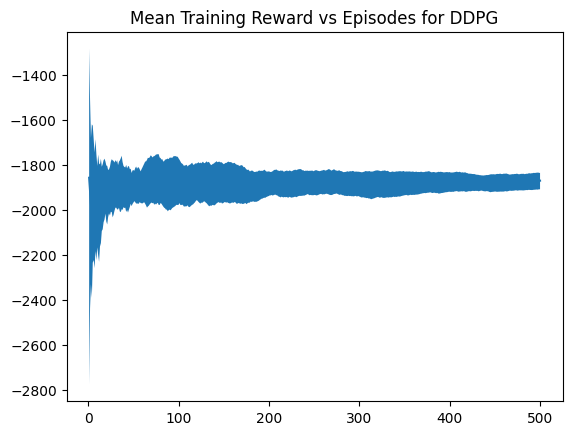

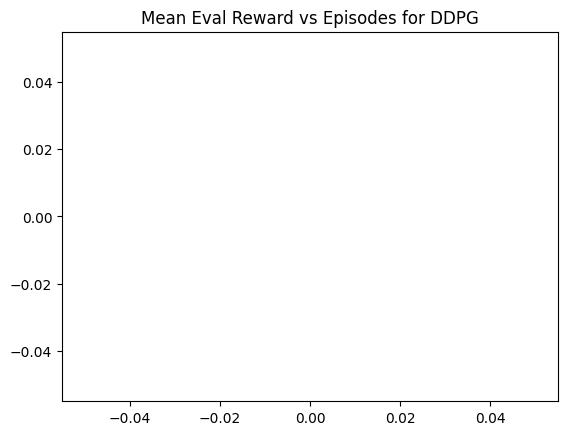

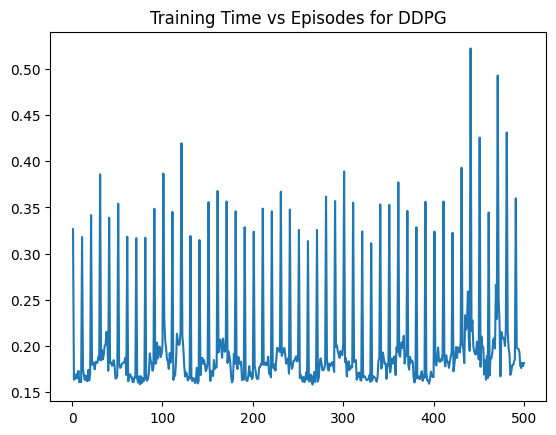

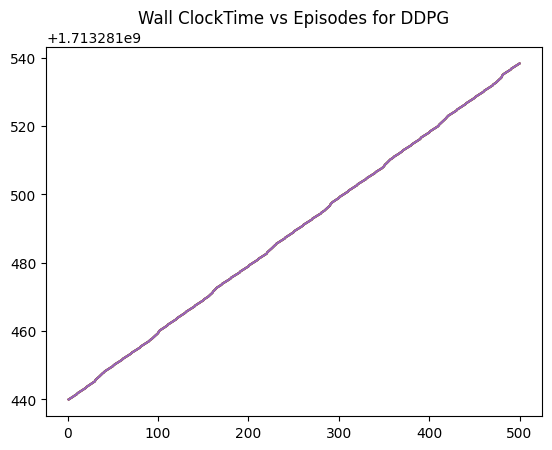

ValueError: x and y must have same first dimension, but have shapes (500,) and (0,)

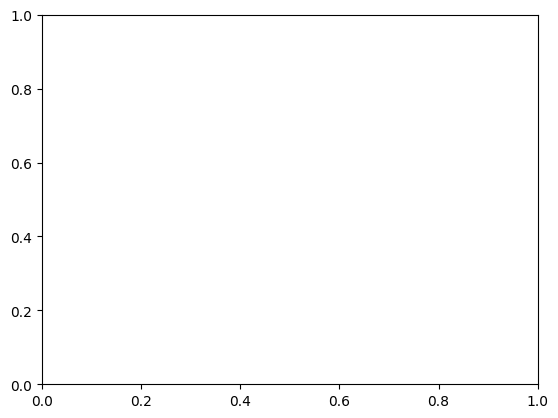

In [ ]:
n=5
envs1 = []
envs2 = []
MAX_TRAIN_EPISODES = 500

def max_of_five(arr1, arr2, arr3, arr4, arr5):
  return np.maximum.reduce([np.array(arr1), np.array(arr2), np.array(arr3), np.array(arr4), np.array(arr5)])

def min_of_five(arr1, arr2, arr3, arr4, arr5):
  return np.minimum.reduce([np.array(arr1), np.array(arr2), np.array(arr3), np.array(arr4), np.array(arr5)])

def avg_of_five(arr1,arr2,arr3, arr4, arr5):
  return (np.array(arr1)+np.array(arr2)+np.array(arr3)+np.array(arr4)+np.array(arr5))/5



for i in range(n):
  envs1.append(gym.make('Pendulum-v1'))
  envs2.append(gym.make('Hopper-v4'))

obj1 = DDPG(envs1[0], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj2 = DDPG(envs1[1], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj3 = DDPG(envs1[2], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj4 = DDPG(envs1[3], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj5 = DDPG(envs1[4], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)

res1 = obj1.runDDPG()
res2 = obj2.runDDPG()
res3 = obj3.runDDPG()
res4 = obj4.runDDPG()
res5 = obj5.runDDPG()


avgTrainReward = avg_of_five(res1[0],res2[0],res3[0],res4[0],res5[0])
maxTrainReward = max_of_five(res1[0],res2[0],res3[0],res4[0],res5[0])
minTrainReward = min_of_five(res1[0],res2[0],res3[0],res4[0],res5[0])


avgTrainingTime = avg_of_five(res1[1],res2[1],res3[1],res4[1],res5[1])


avgEvalReward = avg_of_five(res1[2],res2[2],res3[2],res4[2],res5[2])
minEvalReward = min_of_five(res1[2],res2[2],res3[2],res4[2],res5[2])
maxEvalReward = max_of_five(res1[2],res2[2],res3[2],res4[2],res5[2])

avgTotalSteps = avg_of_five(res1[4],res2[4],res3[4],res4[4],res5[4])

e = np.array(range(MAX_TRAIN_EPISODES))

plt.figure()
plt.fill_between(e+1,minTrainReward, maxTrainReward, alpha=0.5)
plt.plot(e+1, avgTrainReward)
plt.title("Mean Training Reward vs Episodes for DDPG")
plt.show()

plt.figure()
plt.fill_between(e+1,minEvalReward, maxEvalReward,alpha=0.5)
plt.plot(e+1, avgEvalReward)
plt.title("Mean Eval Reward vs Episodes for DDPG")
plt.show()

plt.figure()
plt.plot(e+1,avgTrainingTime)
plt.title("Training Time vs Episodes for DDPG")
plt.show()

plt.figure()
plt.plot(e+1,res1[3])
plt.plot(e+1,res2[3])
plt.plot(e+1,res3[3])
plt.plot(e+1,res4[3])
plt.plot(e+1,res5[3])
plt.title("Wall ClockTime vs Episodes for DDPG")
plt.show()


plt.figure()
plt.plot(e+1, avgTotalSteps)
plt.title("Avg Total Steps vs Episode for DDPG")
plt.show()


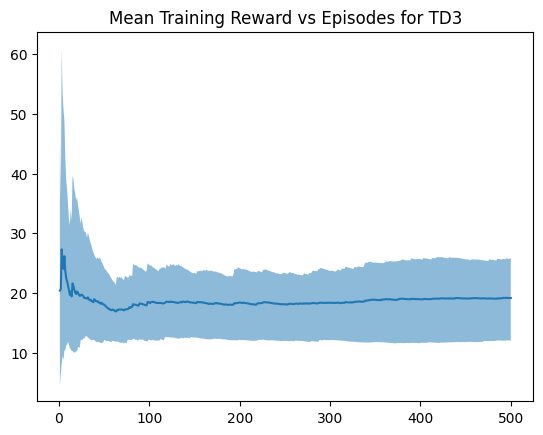

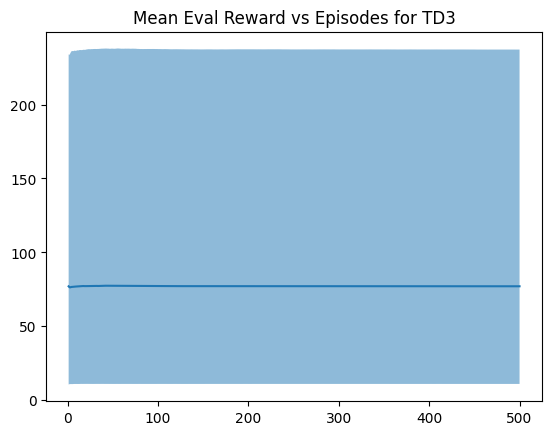

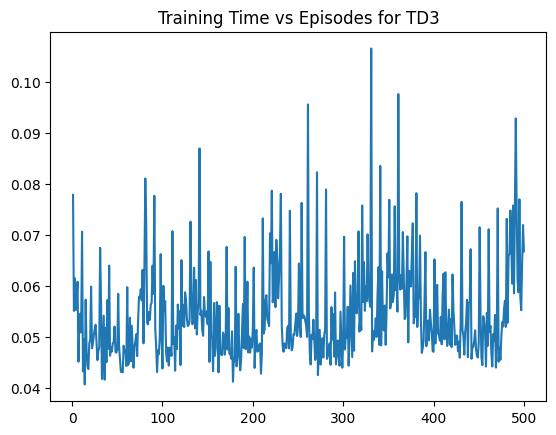

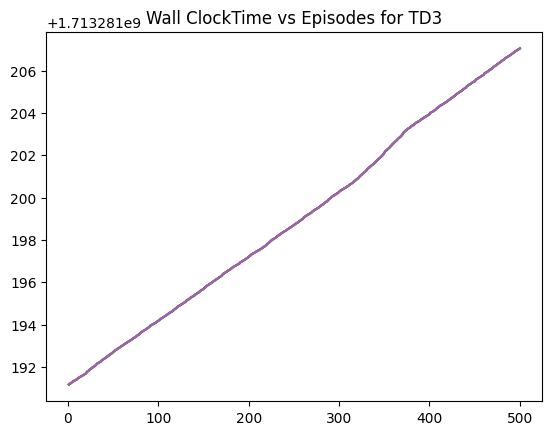

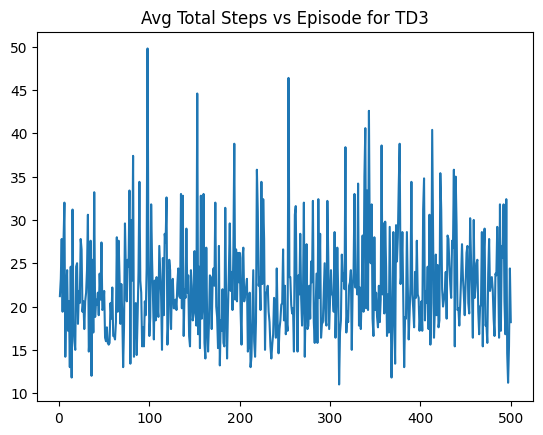

In [ ]:
n=5
envs1 = []
envs2 = []
MAX_TRAIN_EPISODES = 500

def max_of_five(arr1, arr2, arr3, arr4, arr5):
  return np.maximum.reduce([np.array(arr1), np.array(arr2), np.array(arr3), np.array(arr4), np.array(arr5)])

def min_of_five(arr1, arr2, arr3, arr4, arr5):
  return np.minimum.reduce([np.array(arr1), np.array(arr2), np.array(arr3), np.array(arr4), np.array(arr5)])

def avg_of_five(arr1,arr2,arr3, arr4, arr5):
  return (np.array(arr1)+np.array(arr2)+np.array(arr3)+np.array(arr4)+np.array(arr5))/5



for i in range(n):
  envs1.append(gym.make('Pendulum-v1'))
  envs2.append(gym.make('Hopper-v4'))

obj1 = TD3(envs2[0], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj2 = TD3(envs2[1], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj3 = TD3(envs2[2], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj4 = TD3(envs2[3], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)
obj5 = TD3(envs2[4], MAX_TRAIN_EPISODES=MAX_TRAIN_EPISODES)

res1 = obj1.runTD3()
res2 = obj2.runTD3()
res3 = obj3.runTD3()
res4 = obj4.runTD3()
res5 = obj5.runTD3()


avgTrainReward = avg_of_five(res1[0],res2[0],res3[0],res4[0],res5[0])
maxTrainReward = max_of_five(res1[0],res2[0],res3[0],res4[0],res5[0])
minTrainReward = min_of_five(res1[0],res2[0],res3[0],res4[0],res5[0])


avgTrainingTime = avg_of_five(res1[1],res2[1],res3[1],res4[1],res5[1])


avgEvalReward = avg_of_five(res1[2],res2[2],res3[2],res4[2],res5[2])
minEvalReward = min_of_five(res1[2],res2[2],res3[2],res4[2],res5[2])
maxEvalReward = max_of_five(res1[2],res2[2],res3[2],res4[2],res5[2])

avgTotalSteps = avg_of_five(res1[4],res2[4],res3[4],res4[4],res5[4])

e = np.array(range(MAX_TRAIN_EPISODES))

plt.figure()
plt.fill_between(e+1,minTrainReward, maxTrainReward, alpha=0.5)
plt.plot(e+1, avgTrainReward)
plt.title("Mean Training Reward vs Episodes for TD3")
plt.show()

plt.figure()
plt.fill_between(e+1,minEvalReward, maxEvalReward, alpha=0.5)
plt.plot(e+1, avgEvalReward)
plt.title("Mean Eval Reward vs Episodes for TD3")
plt.show()

plt.figure()
plt.plot(e+1,avgTrainingTime)
plt.title("Training Time vs Episodes for TD3")
plt.show()

plt.figure()
plt.plot(e+1,res1[3])
plt.plot(e+1,res2[3])
plt.plot(e+1,res3[3])
plt.plot(e+1,res4[3])
plt.plot(e+1,res5[3])
plt.title("Wall ClockTime vs Episodes for TD3")
plt.show()


plt.figure()
plt.plot(e+1, avgTotalSteps)
plt.title("Avg Total Steps vs Episode for TD3")
plt.show()
